# ME 6104 Computer-Aided Design
## Homework Assignment 2
### Sasha Bakker

In [67]:
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
import numpy as np
from numpy import linalg as LA
import copy
import logging

Read and visualize STL files of the given `tessa_vase_filled.stl` and `Twisted_Vase_Basic_Voroni_Style.stl`.

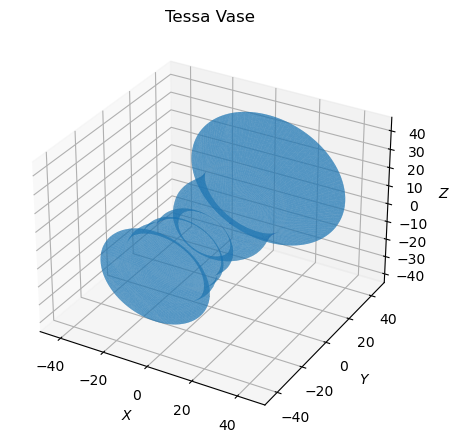

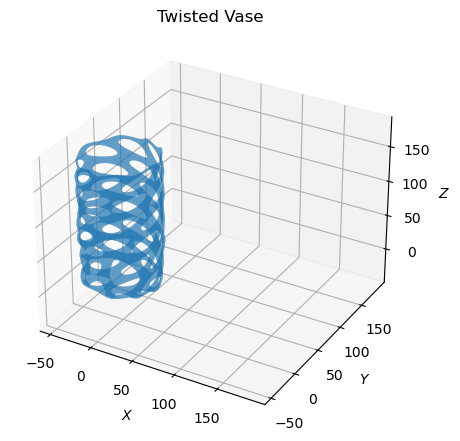

In [15]:
directory = "C:\\Users\\asus\\Documents\\01_Me6104\\HW2\\"
tessa_vase = mesh.Mesh.from_file(directory + 'tessa_vase_filled.stl')
twisted_vase = mesh.Mesh.from_file(directory + 'Twisted_Vase_Basic_Voronoi_Style.stl')

def make_plot(my_mesh, title=""):

    # Initialize figure
    figure = plt.figure(dpi = 100)
    axes = mplot3d.Axes3D(figure, auto_add_to_figure = False)
    figure.add_axes(axes)
    vecs = my_mesh.vectors

    # Add points and scale
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(vecs, alpha=0.5))
    scale = my_mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)
    
    # Label axes
    axes.set_xlabel(r"$X$")
    axes.set_ylabel(r"$Y$")
    axes.set_zlabel(r"$Z$")
    axes.set_title(title)
    
    plt.show()

make_plot(tessa_vase, "Tessa Vase")
make_plot(twisted_vase, "Twisted Vase")

Create rotation matrices and apply them to each one of the vertices.

In [16]:
def trig(theta):
    """
    Parameters:
        - theta: angle in radians
    Returns: 
        - tuple
    """
    return np.cos(theta), np.sin(theta)

def Rx(theta):
    """
    Parameters:
        - theta: angle in radians
    Returns: 
        - rmat: x-axis rotation matrix 
    """
    ct, st = trig(theta)
    rmat = np.array([[1, 0, 0], [0, ct, -st], [0, st, ct]])
    
    return rmat

def Ry(theta):
    """
    Parameters:
        - theta: angle in radians
    Returns:
        - rmat: y-axis rotation matrix
    """
    ct, st = trig(theta)
    rmat = np.array([[ct, 0, st], [0, 1, 0], [-st, 0, ct]])
    
    return rmat

def rotate_triangle(func, theta, triangle):
    """
    Parameters:
        - func: function to compute rotation matrix
        - theta: angle in radians
        - triangle: 3x3 array 
    Returns:
        - triangle: 3x3 array rotated
    """
    for j in range(len(triangle[0])):
        
        point = np.array([triangle[j, :]])
        rmat = func(theta)
        transformed_point = np.dot(point, rmat)
        triangle[j, :] = transformed_point
    
    return triangle

def rotate_surface(func, theta, vecs):
    """
    Parameters:
        - func: function to compute rotation matrix
        - theta: angle in radians
        - vecs: my_mesh.vectors
    Returns:
        - vecs: my_mesh.vectors rotated
    """
    for i in range(np.shape(vecs)[0]):
        
        triangle = vecs[i]
        vecs[i] = rotate_triangle(func, theta, triangle)
    
    return vecs

Rotate the Tessa Vase clockwise about the x-axis by $\frac{\pi}{4}$ and then counter-clockwise about the y-axis by $\frac{\pi}{3}$ using my functions.

Area (before)              = 19166.138671875
Volume (before)            = 113134.61222997644
Center of gravity (before) = [-2.18174727e-03  7.92712223e+00  7.51701210e-07]


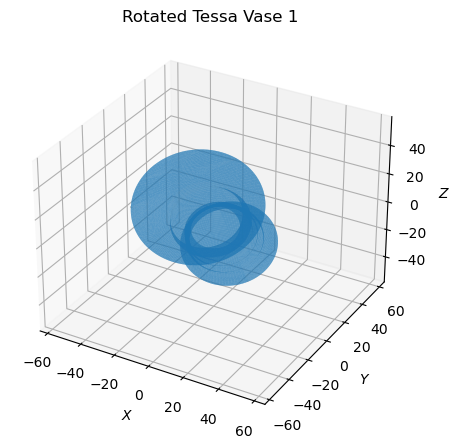

Area (after)              = 19166.138671875
Volume (after)            = 113183.41164659355
Center of gravity (after) = [-4.85746537  5.60736361 -2.80387229]


In [53]:
# NOTE: Clockwise rotation takes (+) theta, counter-clockwise rotation takes (-) theta

def metrics(my_mesh, note = ""):
    """
    Parameters:
        - my_mesh: mesh stl object
        - note: string specifies before or after transformation
    Returns:
        - Area1: computed area
        - volume1: computed volume
        - cog1: computed center of gravity 
    """
    Area1 = my_mesh.areas.sum()
    volume1, cog1, inertia1 = my_mesh.get_mass_properties()
    print("Area " + note + "              = {0}".format(Area1))
    print("Volume " + note + "            = {0}".format(volume1))
    print("Center of gravity " + note + " = {0}".format(cog1))
    
    return Area1, volume1, cog1
    
logging.getLogger("stl").setLevel(logging.ERROR)
tessa_1 = copy.deepcopy(tessa_vase)
ts_area, ts_vol, ts_cog = metrics(tessa_1, "(before)")

# Perform Rotations
tessa_1.vectors = rotate_surface(Rx, np.pi/4, tessa_1.vectors)
tessa_1.vectors = rotate_surface(Ry, -np.pi/3, tessa_1.vectors)
make_plot(tessa_1, "Rotated Tessa Vase 1")

ts1_area, ts1_vol, ts1_cog = metrics(tessa_1, "(after)")

Complete the rotations by implementing `mesh.rotate()` from `numpy-stl`.

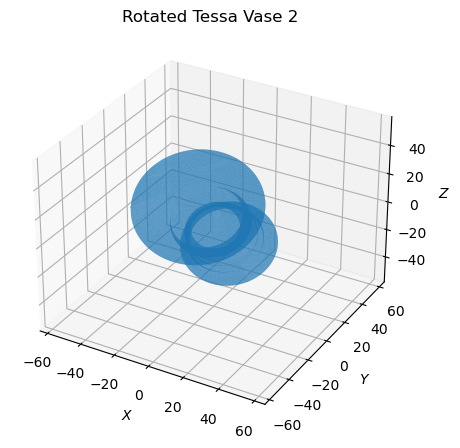

Area (after)              = 19166.138671875
Volume (after)            = 113183.41164659355
Center of gravity (after) = [-4.85746537  5.60736361 -2.80387229]


In [54]:
tessa_2 = copy.deepcopy(tessa_vase)

# Perform Rotations
tessa_2.rotate([1,0,0], np.pi/4)
tessa_2.rotate([0,1,0], -np.pi/3)
make_plot(tessa_2, "Rotated Tessa Vase 2")

ts2_area, ts2_vol, ts2_cog = metrics(tessa_2, "(after)")

Let us measure the difference in numerical results of area, volume, and c.o.g. between the surface rotated using my functions and the surface rotated using `numpy-stl`.

In [55]:
print(f"2-Norm of area difference: {LA.norm(ts2_area - ts1_area)}")
print(f"2-Norm of volume difference: {LA.norm(ts2_vol - ts1_vol)}")
print(f"2-Norm of c.o.g. difference: {LA.norm(ts2_cog - ts1_cog)}")

2-Norm of area difference: 0.0
2-Norm of volume difference: 0.0
2-Norm of c.o.g. difference: 0.0


The two methods produce the same results because the norms of the differences are zero. 

Rotate the Twisted Vase clockwise about the x-axis by $\frac{\pi}{4}$ and then counter-clockwise about the y-axis by $\frac{\pi}{3}$ using my functions.

Area (before)              = 65392.61328125
Volume (before)            = 52637.25830743249
Center of gravity (before) = [-5.75408276e-02  6.24933043e-02  8.72113242e+01]


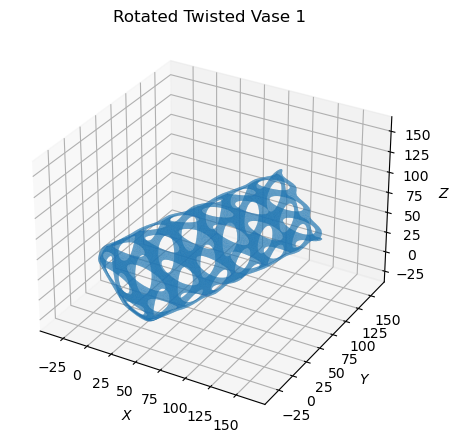

Area (after)              = 65392.61328125
Volume (after)            = 52637.25843389666
Center of gravity (after) = [53.33877344 61.71191054 30.86159722]


In [57]:
twist_1 = copy.deepcopy(twisted_vase)
tw_area, tw_vol, tw_cog = metrics(twist_1, "(before)")

# Perform Rotations
twist_1.vectors = rotate_surface(Rx, np.pi/4, twist_1.vectors)
twist_1.vectors = rotate_surface(Ry, -np.pi/3, twist_1.vectors)
make_plot(twist_1, "Rotated Twisted Vase 1")

tw1_area, tw1_vol, tw1_cog = metrics(twist_1, "(after)")

Complete the rotations by implementing `mesh.rotate()` from `numpy-stl`.

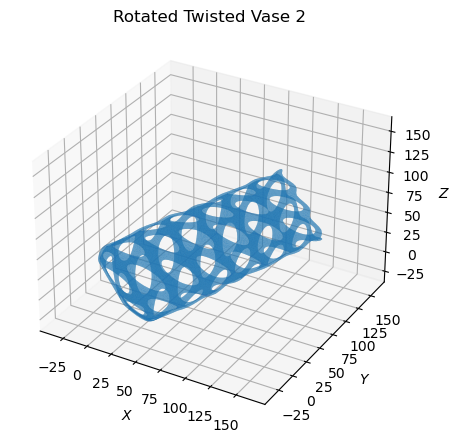

Area (after)              = 65392.61328125
Volume (after)            = 52637.25843389666
Center of gravity (after) = [53.33877344 61.71191054 30.86159722]


In [58]:
twist_2 = copy.deepcopy(twisted_vase)

# Perform Rotations
twist_2.rotate([1,0,0], np.pi/4)
twist_2.rotate([0,1,0], -np.pi/3)
make_plot(twist_2, "Rotated Twisted Vase 2")

tw2_area, tw2_vol, tw2_cog = metrics(twist_2, "(after)")

Let us measure the difference in numerical results of area, volume, and c.o.g. between the surface rotated using my functions and the surface rotated using `numpy-stl`.

In [59]:
print(f"2-Norm of area difference: {LA.norm(tw2_area - tw1_area)}")
print(f"2-Norm of volume difference: {LA.norm(tw2_vol - tw1_vol)}")
print(f"2-Norm of c.o.g. difference: {LA.norm(tw2_cog - tw1_cog)}")

2-Norm of area difference: 0.0
2-Norm of volume difference: 0.0
2-Norm of c.o.g. difference: 0.0


The two methods produce the same results because the norms of the differences are zero. 

Calculate the area for each triangular surface using cross-product and sum them to get the total surface area.

In [60]:
def area_triangle(triangle):
    """
    Parameters:
        - triangle: 3x3 array
    Returns:
        - area: triangle area
    """
    A = triangle[0, :]
    B = triangle[1, :]
    C = triangle[2, :]
    
    AB = A - B
    AC = A - C
    
    Q = np.cross(AB, AC)
    area = 0.5*LA.norm(Q)
    
    return area

def area_surface(vecs):
    """
    Parameters:
        - vecs: my_mesh.vectors
    Returns:
        - tot_area: total area of surface
    """
    tot_area = 0.0
    
    for i in range(np.shape(vecs)[0]):
        
        triangle = vecs[i]
        tot_area += area_triangle(triangle)
        
    return tot_area

Compute Tessa Vase area:

In [65]:
ts_a1 = area_surface(tessa_vase.vectors)
ts_a2 = np.sum(tessa_vase.areas)
print(f"Area by cross-product: {ts_a1}")
print(f"Area by numpy-stl: {ts_a2}")
print(f"2-Norm difference in areas: {LA.norm(ts_a1 - ts_a2)}")

Area by cross-product: 19166.13874903135
Area by numpy-stl: 19166.138671875
2-Norm difference in areas: 7.715635001659393e-05


The error of the cross-product computation is on the order of $10^{-5}$.

Compute Twisted Vase area:

In [66]:
tw_a1 = area_surface(twisted_vase.vectors)
tw_a2 = np.sum(twisted_vase.areas)
print(f"Area by cross-product: {tw_a1}")
print(f"Area by numpy-stl: {tw_a2}")
print(f"2-Norm difference in areas: {LA.norm(tw_a1 - tw_a2)}")

Area by cross-product: 65392.612611442804
Area by numpy-stl: 65392.61328125
2-Norm difference in areas: 0.0006698071956634521


The error of the cross-product computation is on the order of $10^{-4}$.